# Project 2: By Tyler Graham

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.feather as feather
from scipy.stats import linregress
from scipy.stats import kruskal
from collections import defaultdict
from scipy.stats import chi2_contingency
import patsy
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from itertools import combinations

## Part 1

In [3]:
# Read in clean data
real_estate = feather.read_feather("project1b.feather")


## Part 2

### Question 1: For each continuous variable, create a scatter plot of the continuous variable versus price. Make sure to put the independent variable on the horizontal axis and the dependent variable on the vertical axis.


| Variable | Type | Type Description | Description |
| --- | --- | --- | ---|
| address | object | Python Object since it contains numbers and letters | Address of the real estate |
| city | object | Python Object since it contains numbers | City of the real estate |
| zip | object | int64 since it only has numbers | Zip code of the real estate |
| state | object | Python Object since it contains letters | State of the real estate |
| beds | object | int64 since it only has numbers | Number of beds in the real estate |
| baths | object | int64 since it only has numbers | Number of baths in the real estate |
| sq__ft | object | int64 since it only has numbers | Square footage of the real estate|
| type | object | Python Object since it contains numbers and letters | Real estate type|
| sale_date | object | Python Object since it contains letters | Date of the sale |
| price | object | int64 since it only has numbers| Price of the real estate sale |
| latitude | object | float64 since it contains numbers with a decimal | Latitude of the real estate |
| longittude | object | float64 since it contains numbers with a decimal | Longitude of the real estate |

| Variable | Type | 
| --- | --- |
| address | Non - Categorical variable |
| city | Categorical variable |
| zip | Categorical variable | 
| state | Categorical variable | 
| beds | Categorical variable | 
| baths | Categorical variable |
| sq__ft | Non - Categorical variable |
| type | Categorical variable | 
| sale_date | Non - Categorical variable |
| price | Non - Categorical variable |
| latitude | Non - Categorical variable | 
| longittude | Non - Categorical variable |

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

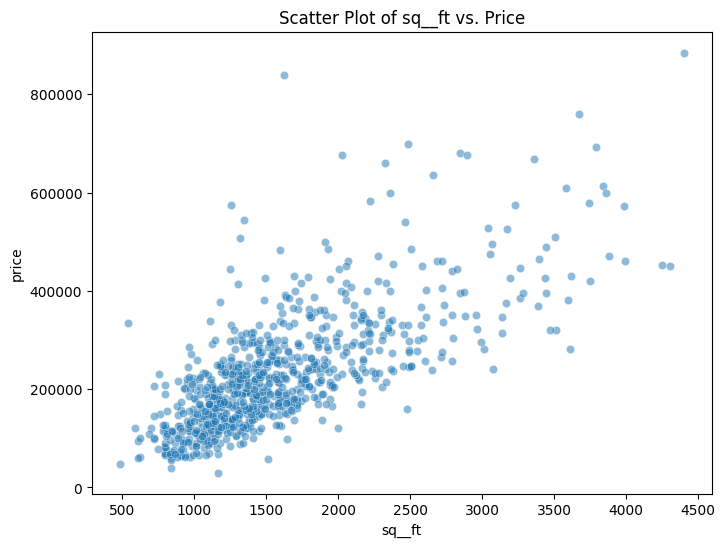

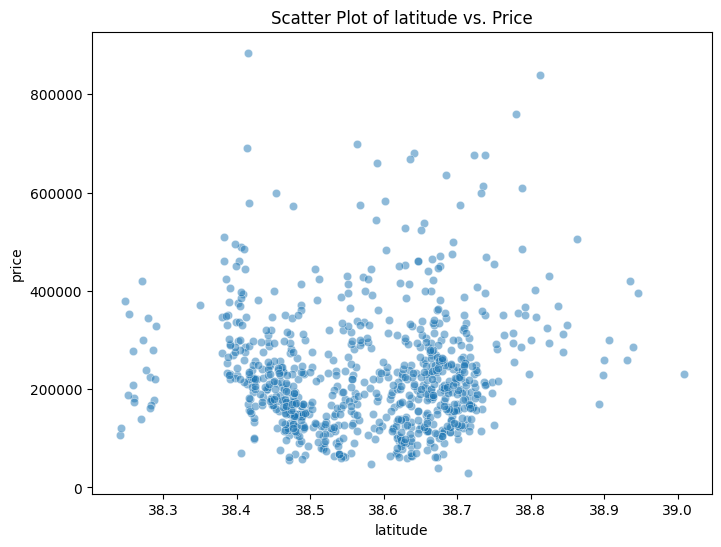

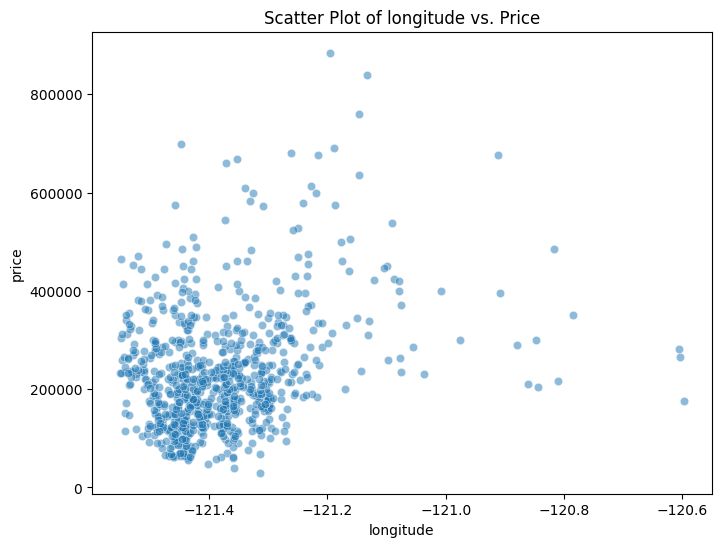

In [4]:
continuous_variables = ['sq__ft', 'latitude', 'longitude'] # Three continous variables


for variable in continuous_variables:
    plt.figure(figsize=(8, 6)) 
    sns.scatterplot(x=variable, y='price', data=real_estate, alpha=0.5)  # Create the Seaborn scatter plot
    plt.title(f'Scatter Plot of {variable} vs. Price')

### Question 2: For each continuous variable, use the scipy.stats.linregress() to fit a simple (one variable) linear regression model, estimate the Pearson's correlation coefficient Links to an external site. r, and the statistical significance (p-value) of the correlation against the price of the property.

In [5]:
regression_results = pd.DataFrame(columns=['Variable', 'Pearson\'s r', 'P-value']) #Cre
results_list = []

for variable in continuous_variables:
    # Perform linear regression / calculate Pearson's correlation
    slope, intercept, r_value, p_value, std_err = linregress(real_estate[variable], real_estate['price'])
    temp_df = pd.DataFrame({'Variable': [variable], 'Pearson\'s r': [r_value], 'P-value': [p_value]}) #store the results
    results_list.append(temp_df)

#Put it all in one dataframe
regression_results = pd.concat(results_list, ignore_index=True)
print(regression_results)

    Variable  Pearson's r        P-value
0     sq__ft     0.728642  1.884826e-135
1   latitude     0.057015   1.042684e-01
2  longitude     0.284571   1.304234e-16


### Question 3: For each categorical variable, create a box plot of the categorical variable versus price. Make sure to put the independent variable on the horizontal axis and the dependent variable on the vertical axis.

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


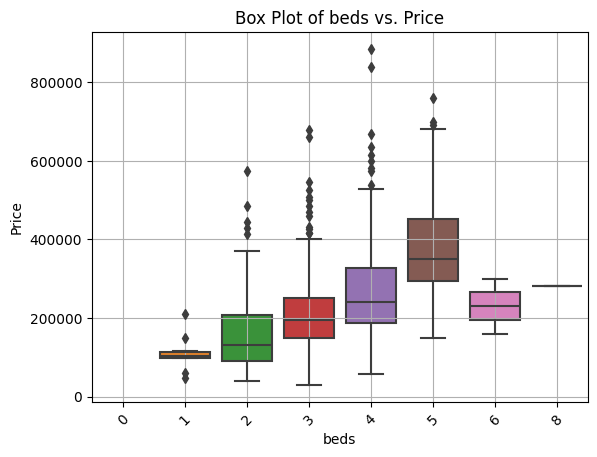

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


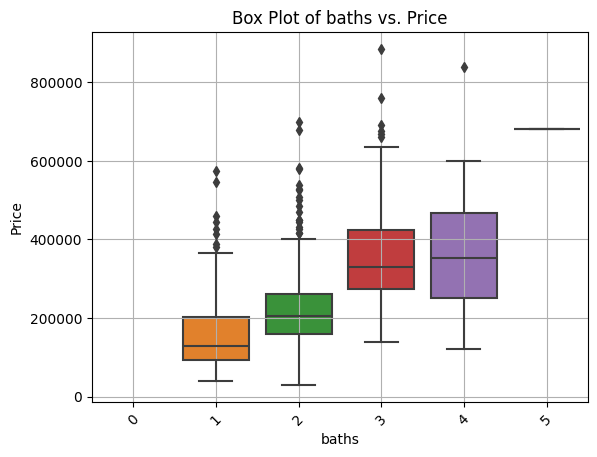

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


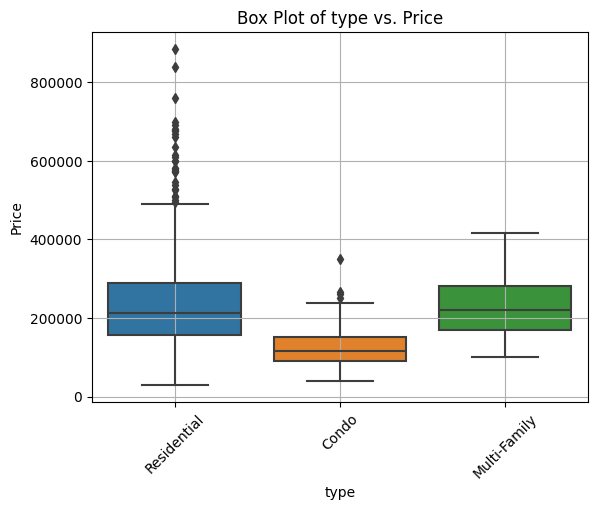

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


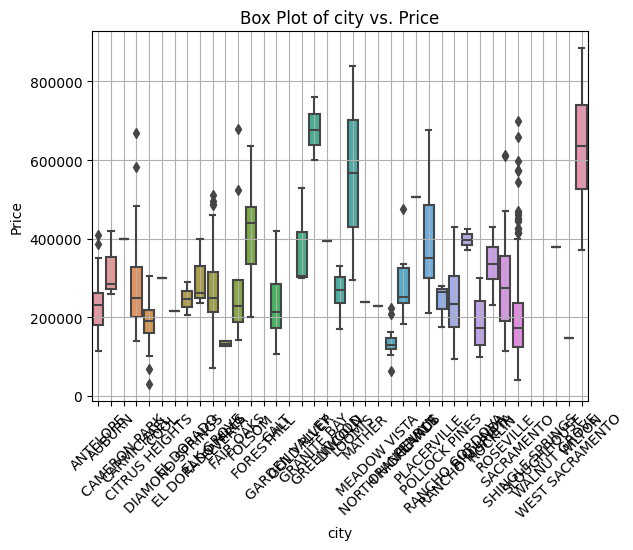

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


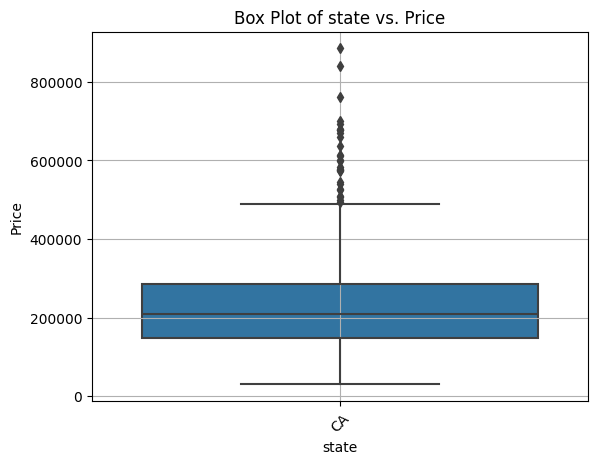

In [6]:
categorical_variables = ['beds', 'baths', 'type', 'city', 'state']  # Replace with your categorical variables

for variable in categorical_variables:
    sns.boxplot(x=variable, y='price', data=real_estate)  # Create the box plot
    plt.title(f'Box Plot of {variable} vs. Price')  # Set the plot title
    plt.xlabel(variable)  # Label for the x-axis
    plt.ylabel('Price')  # Label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True)  # Add grid lines
    plt.show()  # Display the plot

### Question 4: In this example, we want to know if the distribution of prices for condos is different from the distribution for other property types:

In [7]:
#Create masks for condo
condo_mask = real_estate["type"] == "Condo"
other_types_mask = real_estate["type"] != "Condo"

# Select prices for condos
condo_prices = real_estate["price"][condo_mask]
other_types_prices = real_estate["price"][other_types_mask]

# Run the kruskal test
statistic, p_value = kruskal(condo_prices, other_types_prices)
print(f'The Kruskal-Wallis H statistic: {statistic} and the P-Value: {p_value}')

if p_value < .01: #.01 is specified in the written anaylsis
    print("There is statistically a difference in the distribution.")

The Kruskal-Wallis H statistic: 40.5440491820859 and the P-Value: 1.9223310202862152e-10
There is statistically a difference in the distribution.


## Part 3

### Question 1: For each continuous variable, create a box plot of the continuous variable versus property type. Make sure to put the property type on the horizontal axis and the continuous variable on the vertical axis

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


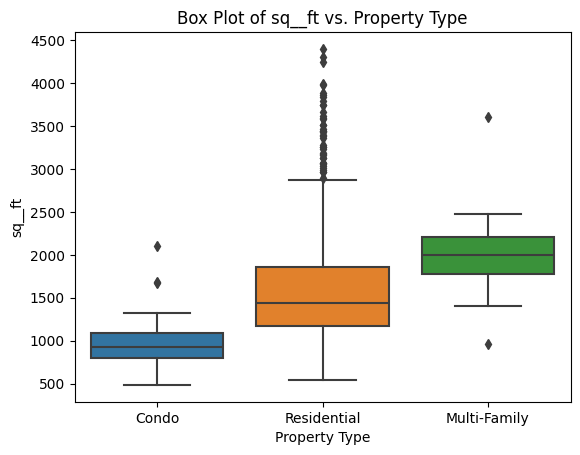

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


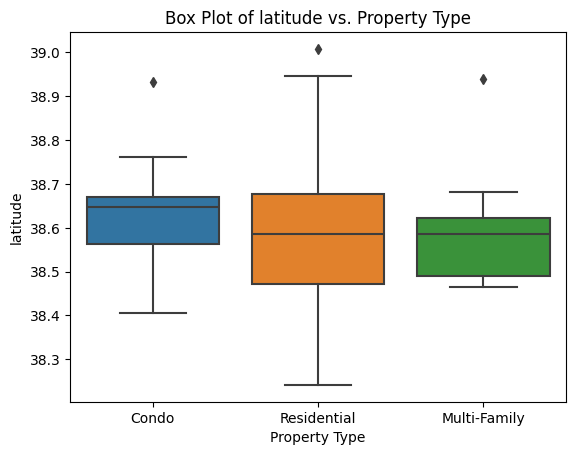

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


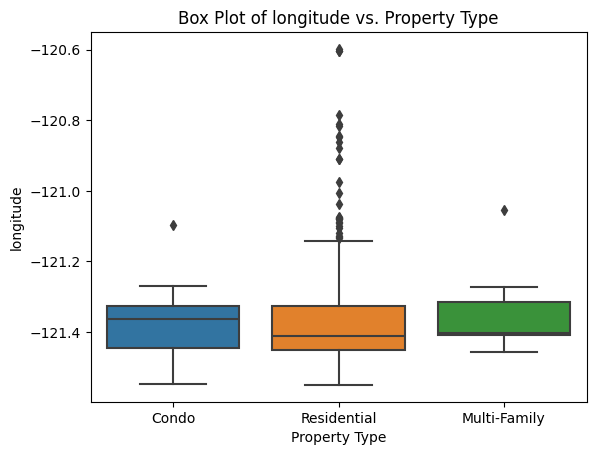

In [27]:
property_types = ['Condo', 'Residential', 'Multi-Family']

# Create box plots for each continuous variable versus property type
for variable in continuous_variables:
    sns.boxplot(x='type', y=variable, data=real_estate, order=property_types)
    plt.title(f'Box Plot of {variable} vs. Property Type') 
    plt.xlabel('Property Type') 
    plt.ylabel(variable)  
    plt.show()  

### Question 2: Run Kruskal-Wallis test for each continuous variable versus the property type.

In [9]:
variables = []
group1_values = []
group2_values = []
statistics = []
p_values = []
significances = []

# Run Kruskal-Wallis test for each continuous variable versus property type
for variable in continuous_variables:
    for pt1, pt2 in combinations(property_types, 2): # using combinations so we dont duplicate date putinto the kruskal backwards
            group1 = real_estate[real_estate['type'] == pt1][variable] #filters the data based on the specified 'type' and extracts the values of the selected column for that group
            group2 = real_estate[real_estate['type'] == pt2][variable]
            statistic, p_value = kruskal(group1, group2)
            significant = 'Yes' if p_value < 0.01 else 'No' # Asked for alpha = .01 in written part 5
                
            # Append the results to the respective lists
            variables.append(variable)
            group1_values.append(pt1)
            group2_values.append(pt2)
            statistics.append(statistic)
            p_values.append(p_value)
            significances.append(significant)

# Merge the lists into a DataFrame
kruskal_results = pd.DataFrame({
    'Variable': variables,
    'Group 1': group1_values,
    'Group 2': group2_values,
    'Statistic': statistics,
    'P-value': p_values,
    'Significant': significances
})

# Display the Kruskal-Wallis test results as a table
print(kruskal_results)

    Variable      Group 1       Group 2  Statistic       P-value Significant
0     sq__ft        Condo   Residential  63.337497  1.741573e-15         Yes
1     sq__ft        Condo  Multi-Family  24.159065  8.869770e-07         Yes
2     sq__ft  Residential  Multi-Family   8.541743  3.470932e-03         Yes
3   latitude        Condo   Residential   4.026077  4.480201e-02          No
4   latitude        Condo  Multi-Family   1.558311  2.119127e-01          No
5   latitude  Residential  Multi-Family   0.055753  8.133392e-01          No
6  longitude        Condo   Residential   0.303054  5.819740e-01          No
7  longitude        Condo  Multi-Family   0.100511  7.512175e-01          No
8  longitude  Residential  Multi-Family   1.706153  1.914852e-01          No


### Question 3: For each categorical variable, create a heat map of the counts of each categorical variable value for each property type.

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


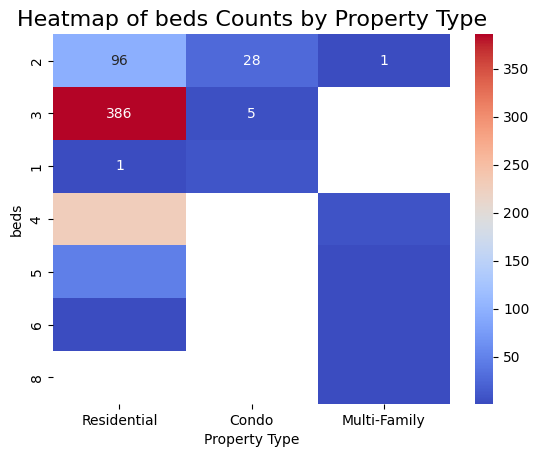

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


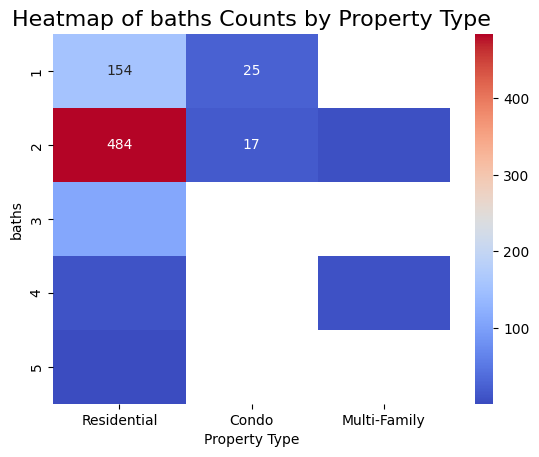

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


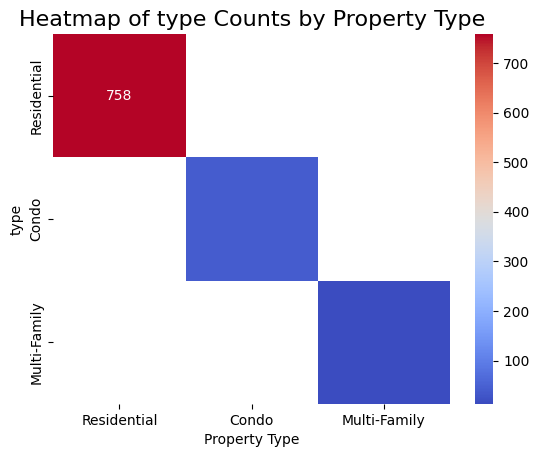

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


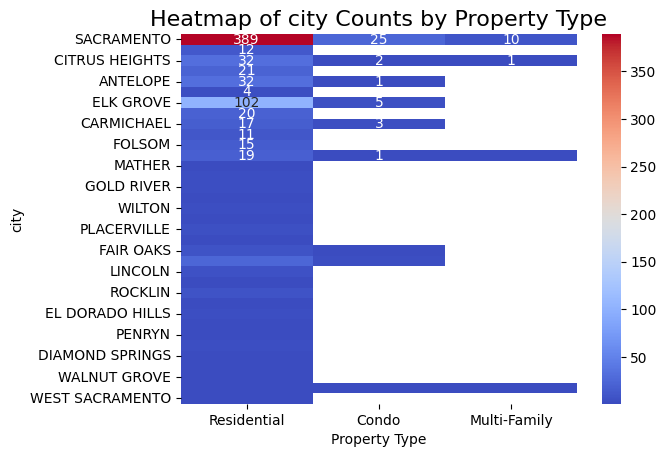

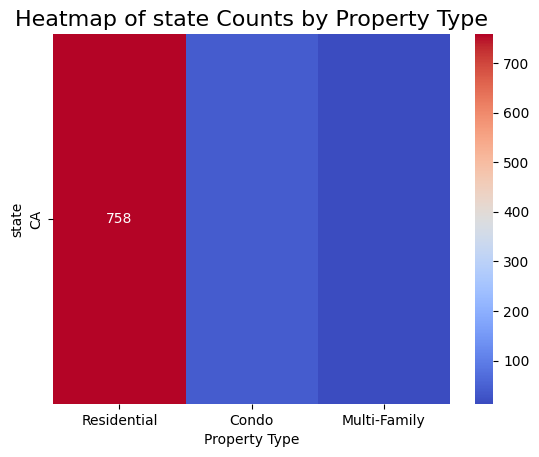

In [32]:
for variable in categorical_variables:
    values_type = defaultdict(lambda: defaultdict(int))
    for idx, row in real_estate.iterrows():
        values_type[row['type']][row[variable]] += 1

    heatmap_df = pd.DataFrame.from_dict(values_type)
    fig = plt.gcf()

    # Create the heatmap using Seaborn
    sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap='coolwarm')
    plt.xlabel("Property Type")
    plt.ylabel(variable)
    plt.title(f"Heatmap of {variable} Counts by Property Type", fontsize=16)

    plt.show()

### Question 4: Run a Chi-squared test of independence between each categorical variable versus the property type.

In [11]:
for variable in categorical_variables:
    contingency_table = pd.crosstab(real_estate[variable], real_estate['type'])

    # Run the Chi-squared test of independence
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print the results
    print(f"{variable} and Property Type:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    if p < 0.01:
        print("There is statistically a difference between the variables.")
    else:
        print("There is not statistically a difference between the variables.")
    print("\n")

beds and Property Type:
Chi-squared statistic: 354.85367715925656
P-value: 1.326663138505771e-68
There is statistically a difference between the variables.


baths and Property Type:
Chi-squared statistic: 223.74439996229896
P-value: 6.226348812878631e-44
There is statistically a difference between the variables.


type and Property Type:
Chi-squared statistic: 1626.0000000000005
P-value: 0.0
There is statistically a difference between the variables.


city and Property Type:
Chi-squared statistic: 47.92114258836475
P-value: 0.9692167110226289
There is not statistically a difference between the variables.


state and Property Type:
Chi-squared statistic: 0.0
P-value: 1.0
There is not statistically a difference between the variables.




## Part 4

### Question 1: Build a linear regression model to predict price with patsy and statsmodels with the square footage as the only variable. The condition number will be large, and you'll get a warning.

In [12]:
# Create the design matrix using patsy
y, X = patsy.dmatrices('price ~ Q("sq__ft")', data=real_estate, return_type='dataframe')

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     917.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.88e-135
Time:                        20:30:53   Log-Likelihood:                -10351.
No. Observations:                 813   AIC:                         2.071e+04
Df Residuals:                     811   BIC:                         2.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.62e+04   7611.940      2.128      

In [13]:
predicted_prices = model.predict(X)

# Calculate the residuals
residuals = real_estate['price'] - predicted_prices
squared_errors = residuals ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 81885.63590721558


### Question 2: Divide the square footage by 1000 by manipulating the DataFrame.  Try building a second model with the scaled square footage and no intercept.  The condition number error should go away.

In [14]:
# Divide the square footage by 1000
real_estate['scaled_square_foot'] = real_estate['sq__ft'] / 1000 #divide by 1000 to fit the data
formula = 'price ~ scaled_square_foot'
y, X = patsy.dmatrices(formula, data=real_estate, return_type='dataframe') 
model = sm.OLS(y, X).fit() # fit new model
print(model.summary()) #print model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     917.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.88e-135
Time:                        20:30:53   Log-Likelihood:                -10351.
No. Observations:                 813   AIC:                         2.071e+04
Df Residuals:                     811   BIC:                         2.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.62e+04   7611

### Question 3: Interpreted the adjusted R2 and RMSE metrics, and a plot of the predicted vs true values to assess the fit of the model.

In [15]:
predicted_prices = model.predict(X)

# Calculate the residuals
residuals = real_estate['price'] - predicted_prices
squared_errors = residuals ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"There is approximately an $81,855 error per square foot.")

print(f"Adjusted R-Value: {model.rsquared_adj}")
print(f"There is a moderate/weak correlation between price and square feet")

Root Mean Square Error (RMSE): 81885.63590721558
There is approximately an $81,855 error per square foot.
Adjusted R-Value: 0.5303407074434648
There is a moderate/weak correlation between price and square feet


/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


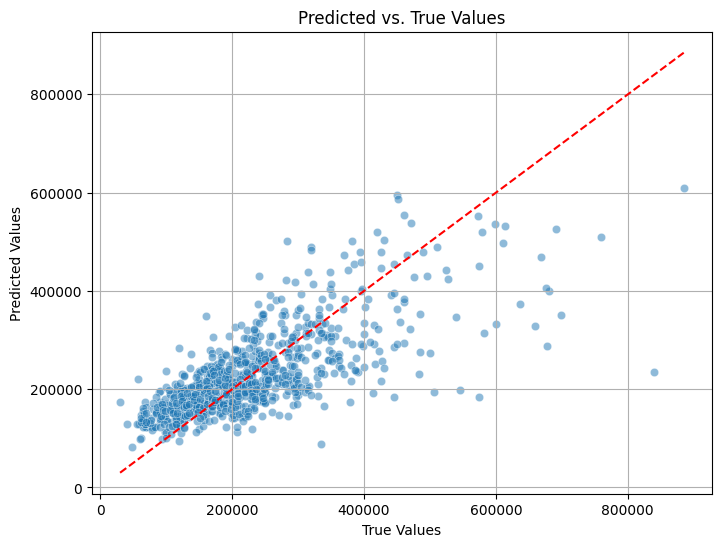

In [16]:
# Create a scatterplot of predicted vs. true values using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y=predicted_prices, data=real_estate, alpha=0.5)
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(real_estate['price']), max(real_estate['price'])], [min(real_estate['price']), max(real_estate['price'])], color='red', linestyle='--')

# Show the plot
plt.show()

### Question 4: Add one variable at a time (excluding the date, zip, state, and city variables).  After each variable is added, check for a condition number warning and the adjusted R2. If the R2 is reduces or a condition number warning appears, then do not keep the variable.

In [17]:
types = len(real_estate.type.unique())
print('There are', types, 'different types of buildings in the real estate data set')
unique_types = real_estate['type'].unique()
print(unique_types)
print(real_estate.type.unique())

There are 3 different types of buildings in the real estate data set
['Residential' 'Condo' 'Multi-Family']
['Residential' 'Condo' 'Multi-Family']


In [18]:
# List of variables to consider (excluding date, zip, state, and city variables)
variables = ['address', 'type', 'beds', 'baths', 'latitude', 'longitude']

final = []
for x in variables:
    # Add variable to the model
    formula_updated = f'price ~ scaled_square_foot + {x}'
    y_updated, X_updated = patsy.dmatrices(formula_updated, data=real_estate, return_type='dataframe')
    model_updated = sm.OLS(y_updated, X_updated).fit()
    print(f' {x} + {model_updated.condition_number} + {model_updated.rsquared_adj}')

    # Determine whether to keep the variable based on R^2_adj and condition number
    if model_updated.rsquared_adj >= model.rsquared_adj and model_updated.condition_number < 30:  # Set condition to where no warning happens
        final.append(x) # add into final list if its good

 address + 4.546039753719047e+28 + 0.9999999507990752
 type + 21.296059009507683 + 0.5351703422890755
 beds + 5155814460366789.0 + 0.5476059795558385
 baths + 2104010682903172.2 + 0.5372855648841095
 latitude + 11873.05012813507 + 0.5469358120620698
 longitude + 124372.69725664248 + 0.5684734630933361


In [19]:
# Finalize the model with selected variables
final_formula = 'price ~ 0 + scaled_square_foot + ' + ' + '.join(final)
final_y, final_X = patsy.dmatrices(final_formula, data=real_estate, return_type='dataframe')
final_model = sm.OLS(final_y, final_X).fit()

#Print the summary of the final model
print("\nFinal Model:")
print(final_model.summary())


Final Model:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     312.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          9.81e-135
Time:                        20:30:54   Log-Likelihood:                -10346.
No. Observations:                 813   AIC:                         2.070e+04
Df Residuals:                     809   BIC:                         2.072e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
type[Condo]         25

In [20]:
predicted_prices = final_model.predict(final_X)

# Calculate the residuals
residuals = real_estate['price'] - predicted_prices
squared_errors = residuals ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(real_estate['price'] - predicted_prices) / real_estate['price']) * 100
print(f'The RSME of the final model is: {rmse}')
print(f'The MAPE of the final model is: {mape}')

The RSME of the final model is: 81363.0114949957
The MAPE of the final model is: 30.104624322233303


### Question 5: Examine residuals to ensure assumptions are met.  Plot the distribution of residuals, and the residuals versus the predicted values.  Check for patterns described in the lectures.

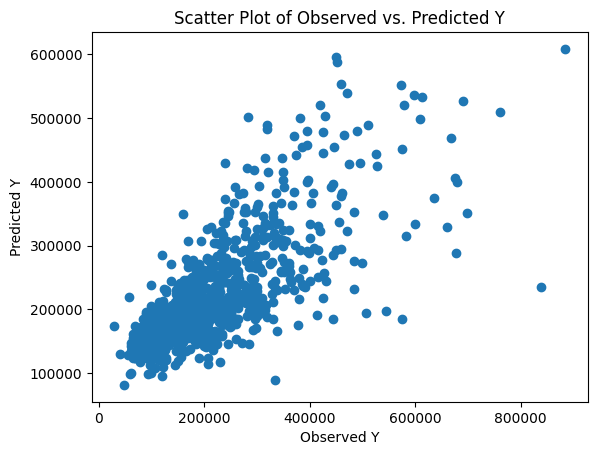

The relationship is linear so the assumption is met.


In [21]:
# Assumption #1: The relationship between the response y and the regressors is linear, at least approximately, in the range of interest
# Get predicted values
assumption1_pred = model.predict(X)

# Create a scatter plot of observed vs. predicted values
plt.scatter(y, assumption1_pred)
plt.xlabel("Observed Y")
plt.ylabel("Predicted Y")
plt.title("Scatter Plot of Observed vs. Predicted Y")
plt.show()
print(f"The relationship is linear so the assumption is met.")

In [22]:
# Assumption #2: The error term ᵰ has zero mean.
residuals = final_model.resid
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals:}")
print(f"The mean is approximately zero so the assumption is met.")

Mean of Residuals: -1.3001858821507603e-10
The mean is approximately zero so the assumption is met.


/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


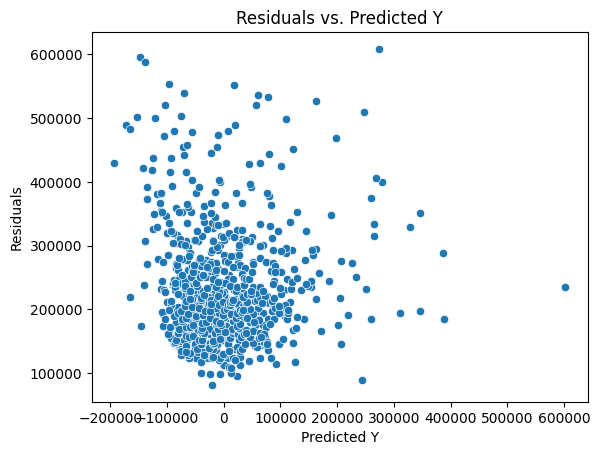

 There is no large scatter so the assumption is met.


In [23]:
# Assumption #3: The error term ᵰ has constant variance sigma 2.
sns.scatterplot(y=assumption1_pred, x=residuals)
plt.xlabel("Predicted Y")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Y")
plt.show()
print(f" There is no large scatter so the assumption is met.")

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


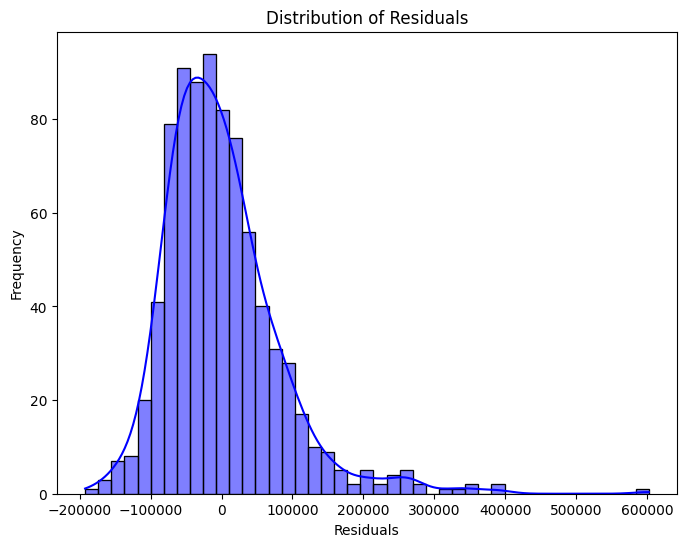

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


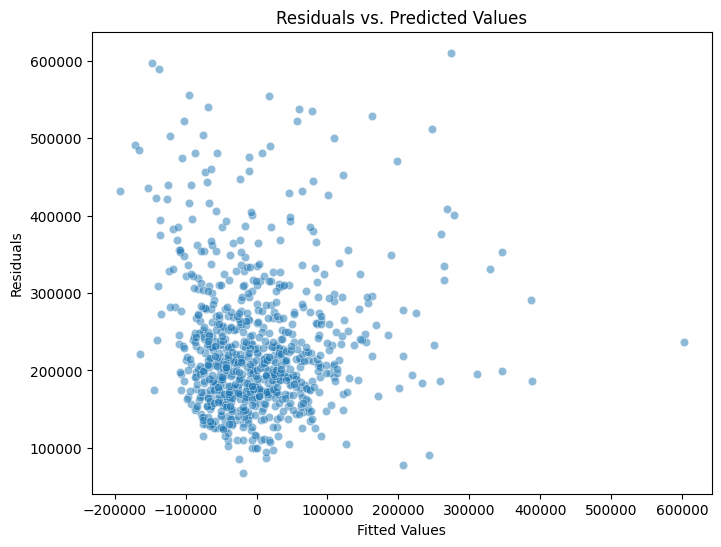

The error are uncorrelated and normally distributed as shown in the plots


In [24]:
#Assumption #4 & 5: The errors are uncorrelated & The errors are normally distributed.

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals vs. Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(y=final_model.fittedvalues, x=residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

print("The error are uncorrelated and normally distributed as shown in the plots")

### Question 6: Identify which variables are significant by interpreting the t-test results.

In [25]:
print(final_model.summary())
print(f'Scaled Squared Foot is not the significant due to having a t-value of 29, but the different types are by having under a 2.5 t-value ')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     312.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          9.81e-135
Time:                        20:30:55   Log-Likelihood:                -10346.
No. Observations:                 813   AIC:                         2.070e+04
Df Residuals:                     809   BIC:                         2.072e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
type[Condo]         2521.5527   1.33

### Question 7: Interpret the remaining model coefficients.  For each input variable, write an English-language sentence describing the relationship between the input variable and output variable.

In [26]:
print(f'For Condo to price, there is a coefficient of 2521.557 meaning there is a correlation of $2,521/sqft.')
print(f'For Multi-Family, there is a coefficicent of -51,180.00 meaning there is a correlation of -$51,180.00/sqft')
print(f'For Residential, there is a coefficient of 18,010.00 meaing there is a correlation of $18,010/sqft')

For Condo to price, there is a coefficient of 2521.557 meaning there is a correlation of $2,521/sqft.
For Multi-Family, there is a coefficicent of -51,180.00 meaning there is a correlation of -$51,180.00/sqft
For Residential, there is a coefficient of 18,010.00 meaing there is a correlation of $18,010/sqft
